# Initial Baseline

The purpose of the first experiment was to ensure that the code works and results in a model that actually learns.
With this in mind, the only parameters that were tuned were the learning rate and momentum. The search space was as follows:
```python
base_config = {
    "model": {"embedding_size": 256, "weight_init": "xavier_norm"},
    "dataset": {
        "window_size": 5,
        "encoding": "p50k_base",
        "train_fraction": 0.8,
        "batch_size": 32,
    },
    "optimiser": {
        "type": "SGD",
        "lr": tune.loguniform(1e-4, 1e-1),
        "momentum": tune.sample_from(lambda _: float(1 - np.power(10, np.random.uniform(-3, -0.5))))
    },
    "loss": {"type": "cross_entropy"},
    "logger": {
        "project": "llm_from_scratch/word2vec",
        "tracking_url": "http://localhost:8080",
    },
    "training": {"epochs": 10},
}
```

This search space was run for 16 iterations, resulting in the following results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
result_dir = Path("/home/ben/Documents/llm-from-scratch/src/llm_from_scratch/demos/word2vec/")

df = pd.read_csv(result_dir / "initial_experiment_results.csv")
df

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,dataset.batch_size,dataset.encoding,...,logger.project,logger.tracking_url,model.embedding_size,model.weight_init,optimiser.lr,optimiser.momentum,training.epochs,epoch,test_loss,train_loss
0,2023-12-17 19:31:12,NaN,acd67227891447ebb77baa974f96fe65,caring-fowl-470,LOCAL,/home/ben/mambaforge/envs/pytorch/lib/python3....,ben,RUNNING,32,p50k_base,...,llm_from_scratch/word2vec,http://localhost:8080,256,xavier_norm,0.000289,0.930078,10,0,0.335457,0.325889
1,2023-12-17 19:31:08,NaN,8e955f3eb0b446909f65af4acaf8c521,receptive-shad-679,LOCAL,/home/ben/mambaforge/envs/pytorch/lib/python3....,ben,RUNNING,32,p50k_base,...,llm_from_scratch/word2vec,http://localhost:8080,256,xavier_norm,0.001430,0.963382,10,1,0.208594,0.207379
2,2023-12-17 19:29:42,1.4min,2a3d0f0c533045dc977321712039821d,abundant-squid-628,LOCAL,/home/ben/mambaforge/envs/pytorch/lib/python3....,ben,FINISHED,32,p50k_base,...,llm_from_scratch/word2vec,http://localhost:8080,256,xavier_norm,0.022626,0.973138,10,9,0.183700,0.055667
3,2023-12-17 19:29:34,1.6min,93070162d8874c1fb8020382d2bb9696,fortunate-finch-178,LOCAL,/home/ben/mambaforge/envs/pytorch/lib/python3....,ben,FINISHED,32,p50k_base,...,llm_from_scratch/word2vec,http://localhost:8080,256,xavier_norm,0.004442,0.998445,10,9,0.208785,0.158158
4,2023-12-17 19:28:18,1.3min,576910e69ec34d4998ff5ea3d541891d,debonair-skunk-259,LOCAL,/home/ben/mambaforge/envs/pytorch/lib/python3....,ben,FINISHED,32,p50k_base,...,llm_from_scratch/word2vec,http://localhost:8080,256,xavier_norm,0.009585,0.996496,10,9,0.237168,0.059722
5,2023-12-17 19:27:56,1.6min,4be35943544347c4bed657da9f696fa3,wise-lark-884,LOCAL,/home/ben/mambaforge/envs/pytorch/lib/python3....,ben,FINISHED,32,p50k_base,...,llm_from_scratch/word2vec,http://localhost:8080,256,xavier_norm,0.000351,0.830098,10,9,0.312719,0.293549
6,2023-12-17 19:26:54,1.3min,e502af80e9774164b90f214df702f073,intelligent-loon-323,LOCAL,/home/ben/mambaforge/envs/pytorch/lib/python3....,ben,FINISHED,32,p50k_base,...,llm_from_scratch/word2vec,http://localhost:8080,256,xavier_norm,0.002383,0.786756,10,9,0.194471,0.231738
7,2023-12-17 19:26:18,1.6min,1a558e3dae344fe9b74c09634812edac,agreeable-duck-15,LOCAL,/home/ben/mambaforge/envs/pytorch/lib/python3....,ben,FINISHED,32,p50k_base,...,llm_from_scratch/word2vec,http://localhost:8080,256,xavier_norm,0.011285,0.998198,10,9,0.200686,0.073299
8,2023-12-17 19:25:30,1.3min,b6743019493942f2a602410475529e40,resilient-goat-514,LOCAL,/home/ben/mambaforge/envs/pytorch/lib/python3....,ben,FINISHED,32,p50k_base,...,llm_from_scratch/word2vec,http://localhost:8080,256,xavier_norm,0.000110,0.966998,10,9,0.264536,0.295865
9,2023-12-17 19:24:38,1.6min,f9d323d9c2174825a0f303fde100fad1,whimsical-mule-558,LOCAL,/home/ben/mambaforge/envs/pytorch/lib/python3....,ben,FINISHED,32,p50k_base,...,llm_from_scratch/word2vec,http://localhost:8080,256,xavier_norm,0.000987,0.995725,10,9,0.153169,0.103318


<Axes: xlabel='log(learning_rate)', ylabel='train_loss'>

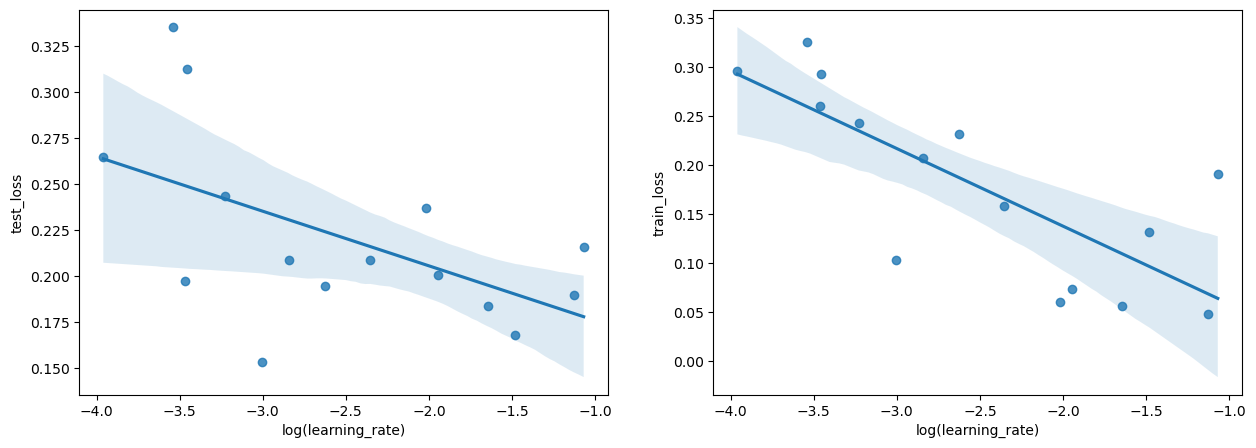

In [3]:
df['log(learning_rate)'] = np.log10(df['optimiser.lr'])
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.regplot(x='log(learning_rate)', y='test_loss', data=df, ax=ax[0])
sns.regplot(x='log(learning_rate)', y='train_loss', data=df, ax=ax[1])

In [4]:
import statsmodels.api as sm

X = sm.add_constant(df['log(learning_rate)'])
sm.OLS(
    df['test_loss'],
    X
).fit().summary()

/home/ben/mambaforge/envs/pytorch/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              test_loss   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     5.587
Date:                Tue, 19 Dec 2023   Prob (F-statistic):             0.0343
Time:                        20:07:05   Log-Likelihood:                 26.641
No. Observations:                  15   AIC:                            -49.28
Df Residuals:                      13   BIC:                            -47.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1460      0.034      4.337      0.001       0.073       0.219
log(learning_rate)    -0.0297      0.013     -2.364      0.034      -0.057      -0.003
==============================================================================
Omnibus:                        0.548   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.097
Skew:                           0.195   Prob(JB):                        0.953
Kurtosis:                       2.941   Cond. No.                         8.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='(1-log(momentum))', ylabel='train_loss'>

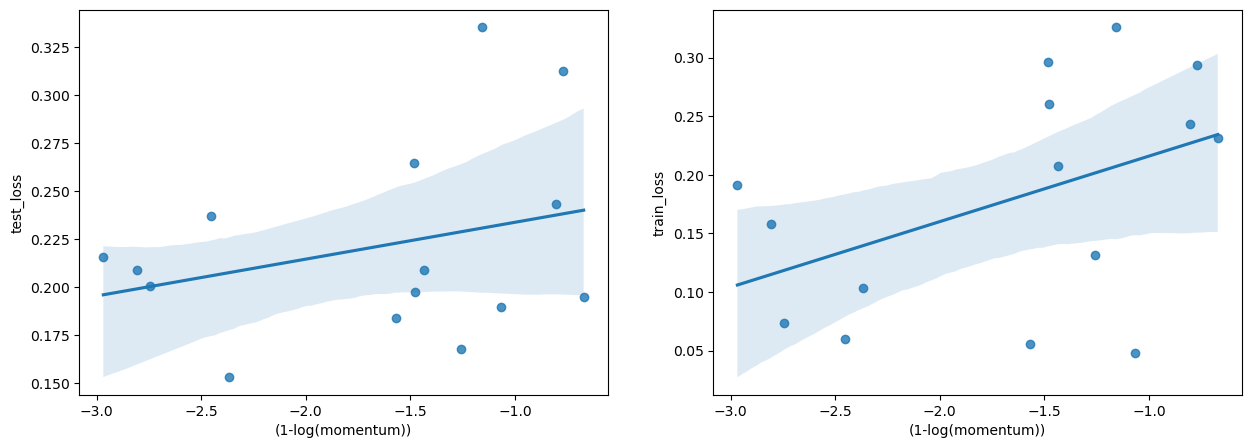

In [5]:
df['(1-log(momentum))'] = np.log10(1-df['optimiser.momentum'])
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.regplot(x='(1-log(momentum))', y='test_loss', data=df, ax=ax[0])
sns.regplot(x='(1-log(momentum))', y='train_loss', data=df, ax=ax[1])

It is pretty clear here that the model is underperforming. It does not seem to generalise well at all. Test loss is not significantly affected by either learning rate or momentum.

It would seem like the model is overfitting. I have several ideas to improve this:
 - increasing the number of parameters in the model
 - adding regularisation
 - increasing the size of the dataset

However, before exploring these, I would like to re-do the above experiments with a few changes.

First, it is clear that there is a strong dependence on learning rate for the train loss but not the test loss. Having inspected the loss curves, it is clear that the models are still learning on the training data. Because of this, I would like to investigate the effect of changing the number of epochs.

At the same time, I would like to change the embedding dimension to 64. We can maybe look at the effect of changing the vector size later but, given that the dataset is very small, I think the embedding size of 256 is too big - TODO come up with a better explanation

# Changing number of epochs

I want to investigate the effect of changing the number of epochs. It seemed like, in the previous experiment, momentum had no effect on the performance so I've fixed it to a sensible default of 0.99. Learning rate has the same range and epochs varies between 5 and 100 (log uniformly distributed)

```python
base_config = {
    "model": {"embedding_size": 32, "weight_init": "xavier_norm"},
    "dataset": {
        "window_size": 5,
        "encoding": "p50k_base",
        "train_fraction": 0.8,
        "batch_size": 32,
    },
    "optimiser": {
        "type": "SGD",
        "lr": tune.loguniform(1e-4, 1e-1),
        "momentum": 0.99,
    },
    "loss": {"type": "cross_entropy"},
    "logger": {
        "project": "llm_from_scratch/word2vec",
        "tracking_url": "http://localhost:8080",
    },
    "training": {"epochs": tune.lograndint(5, 100)},
}
```

<Axes: xlabel='log(epochs)', ylabel='train_loss'>

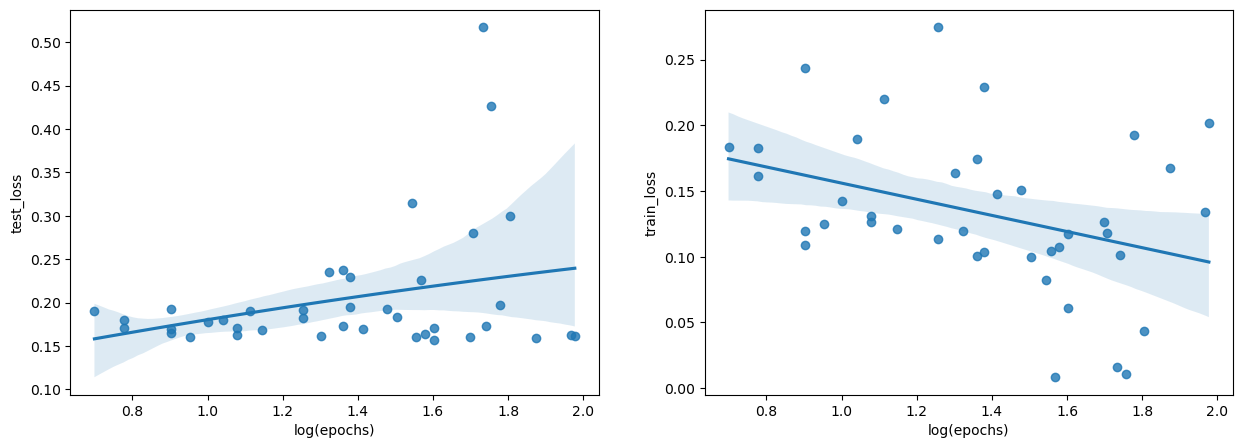

In [20]:
df = pd.read_csv(result_dir / "changing_n_epochs.csv")
df['log(epochs)'] = np.log10(df['training.epochs'])

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.regplot(x='log(epochs)', y='test_loss', data=df, ax=ax[0], order=2)
sns.regplot(x='log(epochs)', y='train_loss', data=df, ax=ax[1], order=1)

<Axes: xlabel='log(lr)', ylabel='train_loss'>

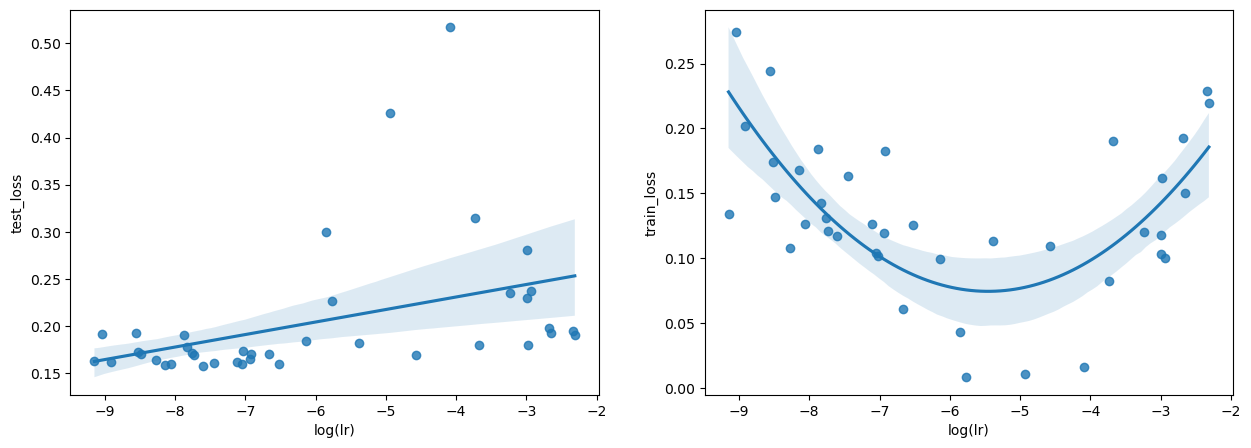

In [17]:
df['log(lr)'] = np.log(df['optimiser.lr'])

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.regplot(x='log(lr)', y='test_loss', data=df, ax=ax[0], order=1)
sns.regplot(x='log(lr)', y='train_loss', data=df, ax=ax[1], order=2)

<Axes: xlabel='train_loss', ylabel='test_loss'>

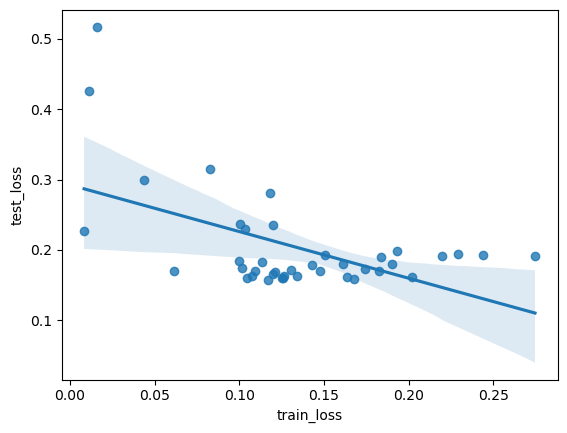

In [21]:
has_stabilised = df['train_loss'] > 0
sns.regplot(x='train_loss', y='test_loss', data=df[has_stabilised], order=1)

# Optimising to_bag_of_words

In [1]:
from llm_from_scratch.demos.word2vec.word2vec_wikipedia import WikipediaDataset

ds = WikipediaDataset(split='valid')

NameError: name 'split' is not defined

In [1]:
import numpy as np
d = np.memmap('/home/ben/Documents/llm-from-scratch/wikipedia.bin', mode='r')

In [2]:
a = d[:-200_000]

In [3]:
d[:len(d)-1].nbytes

8937036261

In [4]:
np.ad

memmap([141,  23, 253, ...,   2, 170,  15], dtype=uint8)

In [5]:
from llm_from_scratch.demos.word2vec.word2vec_wikipedia import Word2Vec

Seed set to 42


In [7]:
model = Word2Vec(50_000)

In [8]:
model

Word2Vec(
  (encoder): Sequential(
    (0): EmbeddingBag(50000, 256, mode='mean')
    (1): ReLU()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=50000, bias=True)
  )
  (loss_fn): NLLLoss()
)

In [28]:
import torch
pred = model.training_step((torch.zeros(10, dtype=int).unsqueeze(0), torch.tensor([0])), _)

In [30]:
pred.backward()